In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
k= 100
n = 100

#1  =  1/(1+x)^2 + m*x^2/(1+x)^2 solve for x
#http://www.few.vu.nl/~wvanwie/Courses/HighdimensionalDataAnalysis/WNvanWieringen_HDDA_Lecture234_RidgeRegression_20182019.pdf

m = 5
alpha = 1/12 
#alpha  = 2/2499
#alpha = k/m? minimizes?

X = np.random.normal(size=(n,k))
E = np.random.normal(size=(n,1))
Y = m*X.sum(axis=1).reshape(n,1) + E

X0 = np.random.normal(size=(n,k))
E0 = np.random.normal(size=(n,1))
Y0 = m*X0.sum(axis=1).reshape(n,1) + E0

In [47]:
XX = (X.T).dot(X)
beta = np.linalg.inv( XX ).dot( X.T ).dot(Y)
Px0 = X0.dot( np.linalg.inv( XX  ) ).dot( X0.T )


#MSE in sample of ols predictor?
E_hat0 = Y0 - X0.dot(beta)
print(   E_hat0.T.dot(E_hat0)[0]/n )

#risk? of ols
risk = X0.sum(axis=1).reshape(n,1) - X0.dot(beta)
print( risk.T.dot(risk)[0]/n )

#theoretical risk?
print(np.trace(Px0)/n)

[81.26259411]
[1626.78677811]
227.49113641417017


In [48]:
XX = (X.T).dot(X)
beta = np.linalg.inv( XX  + alpha*np.identity(k) ).dot( X.T ).dot(Y)
Px0 = X0.dot( np.linalg.inv( XX  + alpha*np.identity(k) ) ).dot( X0.T )


#MSE in sample of ols predictor?
E_hat0 = Y0 - X0.dot(beta)
print(   E_hat0.T.dot(E_hat0)[0]/n )

#risk? of ols
risk = X0.sum(axis=1).reshape(n,1) - X0.dot(beta)
print( risk.T.dot(risk)[0]/n )

#theoretical risk?
print(np.trace(Px0)/n)

[111.18866376]
[1587.33053824]
30.03715061651833


0.6228267785986552
7.3405616910363


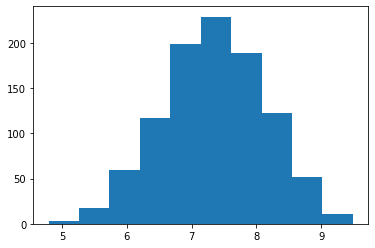

In [49]:
def standardize(array):
    """divide by variance, multiple by sqrt(n)"""
    array = np.array(array)
    return np.sqrt(len(array))*array.mean()/array.std()

n_trials = 1000
mses = []
for i in range(n_trials):
    #split sample for model 1
    X = np.random.normal(size=(n,k))
    E = np.random.normal(size=(n,1))
    Y = m*X.sum(axis=1).reshape(n,1) + E

    
    XX = (X.T).dot(X)
    beta = np.linalg.inv( XX ).dot( X.T ).dot(Y)
    
    E_hat = Y - X.dot(beta)
    mse = E_hat**2
    
    #model 2
    X0 = np.random.normal(size=(n,k))
    E0 = np.random.normal(size=(n,1))
    Y0 = m*X0.sum(axis=1).reshape(n,1) + E0
    
    XX0 = (X0.T).dot(X0)
    beta_r = np.linalg.inv( XX0  + alpha*np.identity(k) ).dot( X0.T ).dot(Y0)
    
    E_hat_r = Y0 - X0.dot(beta_r)
    mse_r = E_hat_r**2
     
    mses.append( standardize(mse_r - mse) )
    
    

mses= np.array(mses)    
plt.hist(mses)
print(mses.var())
print(mses.mean())